<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/Ejercicio_Preprocesamiento_Practica_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


# La pregunta es
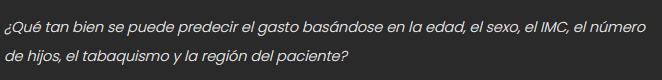

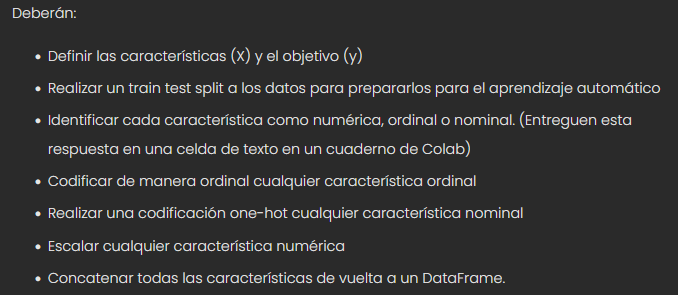

Librerias a utilizar

In [2]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
filename = "/content/drive/MyDrive/Data CodingDojo/insurance.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Preparacion de datos

caracteristicas X y vector objetivo y

In [5]:
y = df["charges"]

X = df.drop(columns="charges")

Modelo de validacion 

train_test_split

el cual separa la matriz de caracteristica y vector objetivo

a una razon de 75 / 25

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [7]:
X_train.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


Caracteristica numerica: "bmi" , "children","age"

Caracteristicas nominales: "sex", "smoker", "region" 

ya que sus valores representan diferentes clases y no estan ordenados.


# Selector de columna para codificacion one-hot

In [8]:
cat_selector = make_column_selector(dtype_include = "object")
cat_selector(X_train)

['sex', 'smoker', 'region']

# Selector de columna para escalamiento de datos

In [9]:
num_selector = make_column_selector(dtype_include = "number")
num_selector(X_train)

['age', 'bmi', 'children']

In [10]:
# creacion de subconjunto de datos solo para las columnas numericas
train_num_data = X_train[num_selector(X_train)]
test_num_data = X_test[num_selector(X_test)]
train_num_data

,age,bmi,children
693,24,23.655,0
1297,28,26.510,2
634,51,39.700,1
1022,47,36.080,1
178,46,28.900,2
...,...,...,...
1095,18,31.350,4
1130,39,23.870,5
1294,58,25.175,0
860,37,47.600,2


In [11]:
# creacion de subconjunto de datos solo para las columnas categoricas
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]

train_cat_data

,sex,smoker,region
693,male,no,northwest
1297,female,no,southeast
634,male,no,southwest
1022,male,yes,southeast
178,female,no,southwest
...,...,...,...
1095,female,no,northeast
1130,female,no,southeast
1294,male,no,northeast
860,female,yes,southwest


# OneHotEncoder

In [12]:
#Instanciar la codificacion one-hot
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

#Ajustar el OneHotEncoder en los datos de Entrenamiento
ohe_encoder.fit(train_cat_data)


# transformar los datos de entrenamiento y de prueba
train_ohe = ohe_encoder.transform(train_cat_data)

test_ohe = ohe_encoder.transform(test_cat_data)

train_ohe


array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [13]:
# convertir en dataframe y obtener una nueva columna de nombres a partir de la codificacion
# establecer prefijos a la columna de nombres original

ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns = ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)

train_ohe

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
998,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
999,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Fin OneHotEncoder

# Escalamiento de caracteristicas numericas




In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(train_num_data)

StandardScaler()

In [16]:
train_scaled = scaler.transform(train_num_data)
test_scaled = scaler.transform(test_num_data)
train_scaled[:5]

array([[-1.08716652, -1.14087456, -0.91749963],
       [-0.80210593, -0.66584152,  0.7436053 ],
       [ 0.83699246,  1.52879447, -0.08694717],
       [ 0.55193187,  0.92647587, -0.08694717],
       [ 0.48066672, -0.26817814,  0.7436053 ]])

In [17]:
X_train_scaled = pd.DataFrame(train_scaled, columns=train_num_data.columns)
X_test_scaled = pd.DataFrame(test_scaled, columns=test_num_data.columns)
X_train_scaled.head()

,age,bmi,children
0,-1.087167,-1.140875,-0.917500
1,-0.802106,-0.665842,0.743605
2,0.836992,1.528794,-0.086947
3,0.551932,0.926476,-0.086947
4,0.480667,-0.268178,0.743605


# Concantenar caracteristicas categoricas de codificacion one-hot con las numericas

In [18]:

train_num = X_train_scaled.reset_index(drop=True)
test_num = X_test_scaled.reset_index(drop=True)

# concatenar

X_train_processed = pd.concat([train_num, train_ohe], axis=1)
X_test_processed = pd.concat([test_num, test_ohe], axis=1)
X_train_processed

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.087167,-1.140875,-0.917500,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.802106,-0.665842,0.743605,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.836992,1.528794,-0.086947,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.551932,0.926476,-0.086947,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.480667,-0.268178,0.743605,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
998,-1.514757,0.139468,2.404710,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
999,-0.018189,-1.105101,3.235263,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1000,1.335848,-0.887967,-0.917500,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1001,-0.160720,2.843247,0.743605,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
